# 500 MeV

In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
with open('spill_data_xsec_2022_10_18_17h12m58s/spill_data_xsec_2022_10_18_17h12m58s.p', 'rb') as f:
    data = pickle.load(f)

In [5]:
data[0][0]

datetime.datetime(2022, 10, 18, 17, 13, 1, 447892)

In [6]:
time_list = []
for i in range(len(data[0])):
    time_list.append(data[0][i].strftime("%Hh%Mm%Ss"))

In [7]:
data[1].keys()

dict_keys(['F61.XSEC023-I1/SpillData', 'F61.XSEC023-I2/SpillData', 'F61.XSEC023-I1/Acquisition', 'F61.XSEC023-I2/Acquisition'])

In [8]:
data[1]['F61.XSEC023-I1/SpillData'][0]

{'semSpillData': array([    80,    -10,    -34,    -10,    -20,    -13,     18,     -7,
            32,    -43,    -34,     47,    -16,   -102,  -6801, -13486,
        -11547, -10400,  -9666, -10068,  -9803,  -9835, -10280,  -9689,
         -9642,  -9665,  -9062,  -9679,  -8832,  -8664,  -8309,  -8409,
         -9220,  -5350,   -515,    -31,    -13,     41,    -79,     88,
          -174,    131], dtype=int32)}

In [9]:
data[1]['F61.XSEC023-I2/SpillData'][0]

{'semSpillData': array([   100,    -10,    -36,     -3,    -14,    -26,     12,      1,
            25,    -51,    -37,     46,    -18,   -109,  -6845, -13539,
        -11596, -10437,  -9713, -10125,  -9852,  -9894, -10338,  -9755,
         -9704,  -9724,  -9133,  -9741,  -8895,  -8731,  -8368,  -8465,
         -9288,  -5396,   -536,    -39,    -21,     25,    -80,     75,
          -191,    114], dtype=int32)}

In [10]:
data[1]['F61.XSEC023-I1/Acquisition'][0]

{'measStamp': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'cycleTime': '',
 'superCycleNb': 13,
 'acqDesc': '',
 'nbOfSamples': 42,
 'semRawData': -90428,
 'semSignalStatus': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8),
 'acqTime': '',
 'semNormData': 25827850000.0,
 'observables': [],
 'totalGain': array([400.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  

# Plot

In [11]:
integrationDuration = data[1]['F61.XSEC023-I1/Acquisition'][0]["integrationDuration"]
print(integrationDuration)
nbOfSamples = data[1]['F61.XSEC023-I1/Acquisition'][0]["nbOfSamples"]
print(nbOfSamples)

840
42


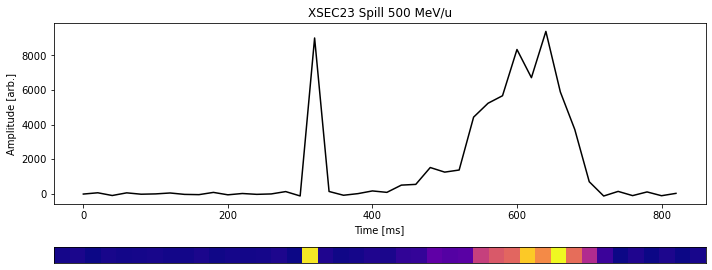

In [12]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))
signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][2]["semSpillData"]
signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][2]["semSpillData"]

d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
df = pd.DataFrame(data=d)


fig, ax = plt.subplots(2,1, tight_layout=True, figsize=(10,5))
ax[0].plot(df.t, -df.signal_23_I1, color="k")

heatmap = np.reshape(-signal_23_I1, (1, len(-signal_23_I1)))

ax[1].imshow(heatmap, cmap="plasma")

ax[0].set_title("XSEC23 Spill 500 MeV/u")
ax[0].set_xlabel("Time [ms]")
ax[0].set_ylabel("Amplitude [arb.]")

ax[1].xaxis.set_ticks_position('none') 
ax[1].yaxis.set_ticks_position('none') 
ax[1].set_xticklabels([]);
ax[1].set_yticklabels([]);
plt.savefig("heatmap_example.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

In [13]:
signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][0]["semSpillData"]
heatmap = np.reshape(signal_23_I1, (1, len(signal_23_I1)))
for i in range(len(data[1]['F61.XSEC023-I1/SpillData'])):
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    heatmap=np.vstack([-signal_23_I1, heatmap])

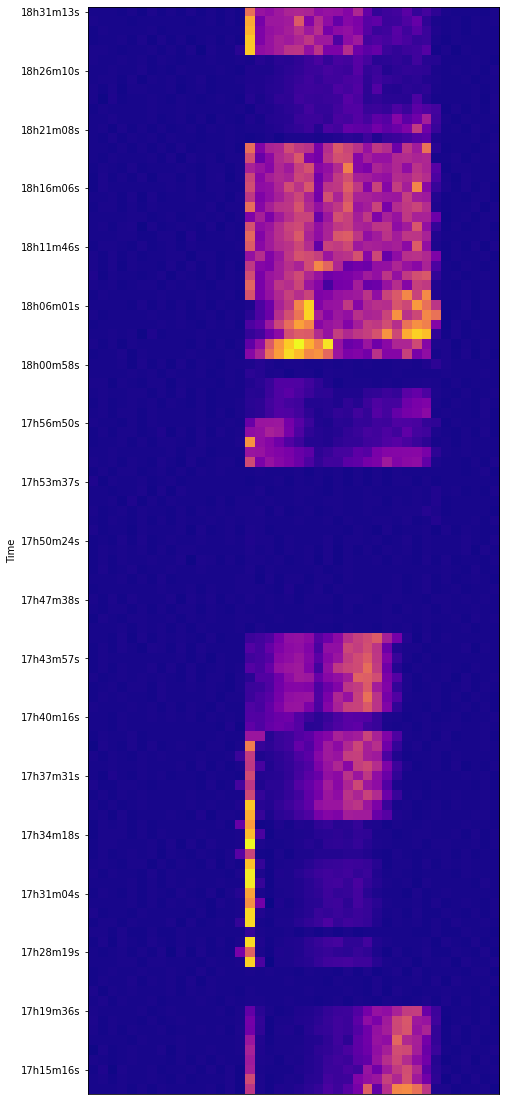

In [14]:
fig, ax = plt.subplots(figsize=(10,20))
ax.imshow(heatmap[:-2], cmap="plasma")

x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
step = np.shape(heatmap)[0]//20 + 1
ax.set_yticks(np.arange(0, np.shape(heatmap)[0],  step))
try:
    ax.set_yticklabels(time_list[:2:-step]) # Reverse order
except:
    print("error on yticklabels")

ax.set_ylabel("Time")
plt.savefig("xsec_spill_history_500_MeV.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

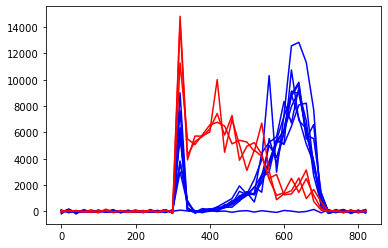

In [15]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots()
# First shots
for i in np.linspace(1,10,10):
    i = int(i)
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)

    ax.plot(df.t, -df.signal_23_I1, color="b")
    
# Last shots
for i in [-1,-2,-3]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)

    ax.plot(df.t, -df.signal_23_I1, color="r")

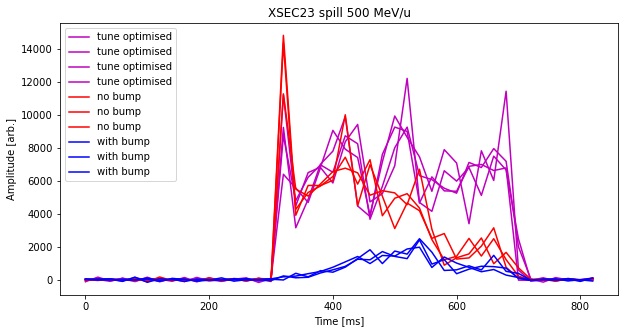

In [16]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots(figsize=(10,5))
    

# Last shots optimised for tune
for i in [-15,-16,-17,-18]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="m", label="tune optimised")

# Last shots no bump
for i in [-1,-2,-3]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="r", label="no bump")
    
# Last shots with bump
for i in [-6,-7,-8]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="b", label="with bump")
    
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Amplitude [arb.]")
ax.set_title("XSEC23 spill 500 MeV/u")
ax.legend()

Text(0.5, 1.0, 'XSEC23 spill 500 MeV/u')

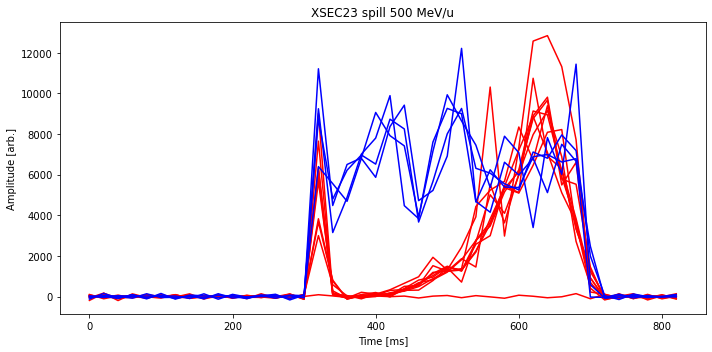

In [17]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots(tight_layout=True, figsize=(10,5))
    
# First shots
for i in np.linspace(1,10,10):
    i = int(i)
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)

    ax.plot(df.t, -df.signal_23_I1, color="r")

# Last shots optimised for tune
for i in [-15,-16,-17,-18]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="b")

ax.set_xlabel("Time [ms]")
ax.set_ylabel("Amplitude [arb.]")
ax.set_title("XSEC23 spill 500 MeV/u")

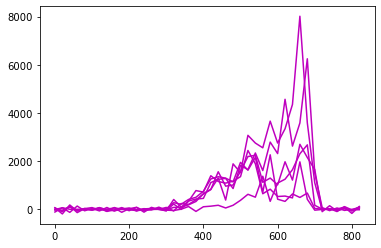

In [18]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots()
    
    
# Last shots optimised for tune
for i in [-14,-13,-12, -11, -10, -9]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="m")